<a href="https://colab.research.google.com/github/jsswope/Bikes/blob/master/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 28.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files


uploaded = files.upload()


Saving foodhub_order.csv to foodhub_order.csv


### Understanding the structure of the data

In [5]:
# Write your code here to read the data
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['foodhub_order.csv']))
print(df)


      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  Not given   
1          Japanese  

In [6]:
# Write your code here to view the first 5 rows
print(df.head(5))

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here

print("Shape of DataFrame", df.shape)

print("Number of rows : " , df.shape[0])

print("Number of columns : ", df.shape[1])

Shape of DataFrame (1898, 9)
Number of rows :  1898
Number of columns :  9


#### Observations:
Number of Rows 1898
Number of Columns 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Types are: int64, object, float64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

df.isnull().count()

,0
order_id,1898
customer_id,1898
restaurant_name,1898
cuisine_type,1898
cost_of_the_order,1898
day_of_the_week,1898
rating,1898
food_preparation_time,1898
delivery_time,1898


#### Observations:
Missing data is 0

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here

print(df.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations:


The Minimum is 20 minutes, the average is 27 minutes and the maximum time for food prep time is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [20]:
# Write the code here

df.loc[df['rating']=='Not given', 'rating'].value_counts()

,count
rating,
Not given,736


#### Observations:


There are 736 ratings of 'not given' in the data set.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<ipython-input-29-0a5928af77dd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')


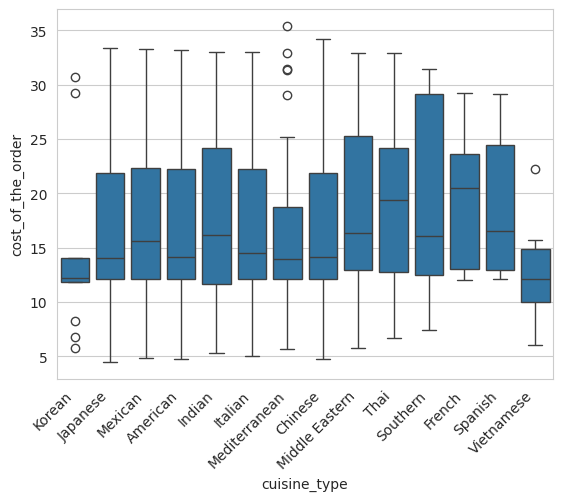

In [29]:
# Write the code here

# Vertical Boxplot Grouping

#Cost of the order in cuisine type category
sns.set_style("whitegrid")
plot1 = sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Analysis - Most cuisines have a minimal value of less than 10,𝑀𝑒𝑑𝑖𝑡𝑒𝑟𝑟𝑎𝑛𝑒𝑎𝑛𝑐𝑢𝑖𝑠𝑖𝑛𝑒ℎ𝑎𝑠𝑎𝑙𝑜𝑡𝑜𝑓𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠𝑜𝑓ℎ𝑖𝑔ℎ𝑣𝑎𝑙𝑢𝑒.𝐾𝑜𝑟𝑒𝑎𝑛ℎ𝑎𝑠𝑏𝑜𝑡ℎ𝑙𝑜𝑤𝑎𝑛𝑑ℎ𝑖𝑔ℎ𝑣𝑎𝑙𝑢𝑒𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠.𝐹𝑟𝑒𝑛𝑐ℎℎ𝑎𝑠𝑎𝑟𝑜𝑢𝑔ℎ𝑙𝑦𝑎22 dollar median value. Which is the highest of all cuisines. Korean has the lowest median cost of around $12 dollars.

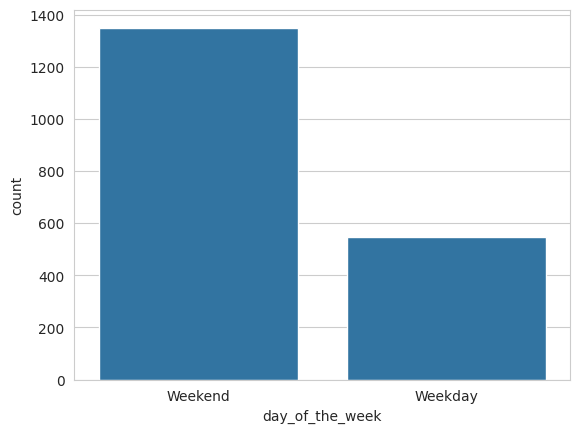

In [34]:
plot2 = sns.countplot(x='day_of_the_week', data=df)
#plot2.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Most orders are placed on weekends.

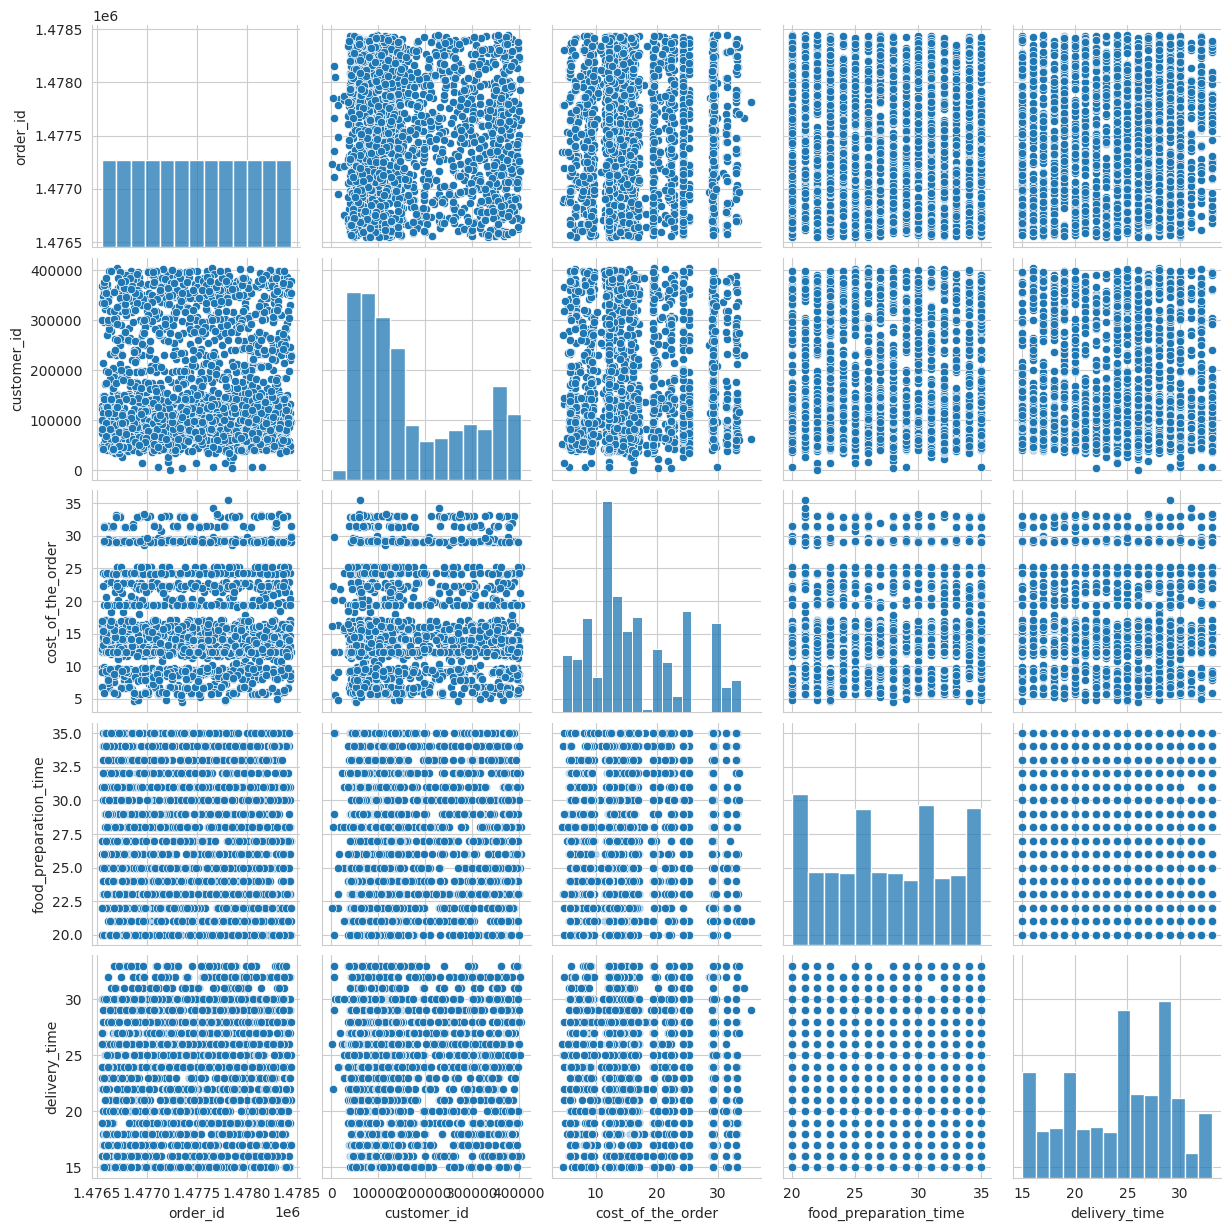

In [35]:
sns.pairplot(df)

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

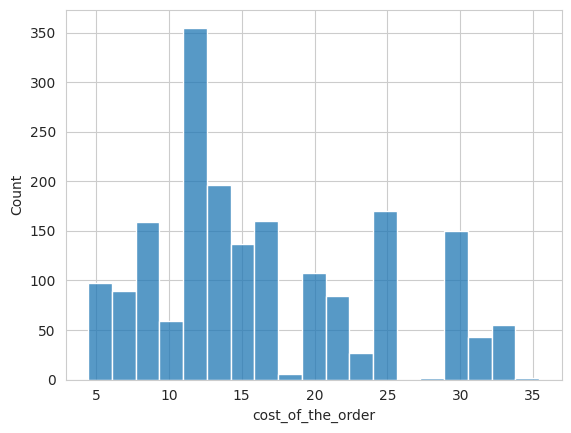

In [37]:
sns.histplot(df['cost_of_the_order'], kde=False)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [47]:
# Write the code here

df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:Shake Shack has the most orders on weekends and Parm has the least orders on weekends

1.   List item
2.   List item




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Write the code here

df[df['day_of_the_week'] == 'Weekend'].groupby('day_of_the_week').cuisine_type.value_counts()


day_of_the_week  cuisine_type  
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:
American Cuisine is the most popular Cuisine on Weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [58]:
# Write the code here

more_than_twenty = df[df["cost_of_the_order"]> 20.00]

total = more_than_twenty.shape[0]

row_total = df.shape[0]

percent = (total/row_total) * 100

print(f"{percent:.2f}% of orders costing more than $20.00 dollars")




29.24% of orders costing more than $20.00 dollars


#### Observations:
29.24% of the total orders are greater than $20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [64]:
# Write the code here

delivery_time = df['delivery_time']

mean_delivery_time = delivery_time.mean

print(f"The mean delivery time is: {mean_delivery_time}")

The mean delivery time is: <bound method Series.mean of 0       20
1       23
2       28
3       15
4       24
        ..
1893    17
1894    19
1895    24
1896    31
1897    24
Name: delivery_time, Length: 1898, dtype: int64>


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [65]:
# Write the code here

df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:The top 3 most popular customer Ids are 52832, 47440, 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [72]:
# Write the code here

df['day_of_the_week'].replace(['weekend', 'weekday'],
[0, 1], inplace=True)
print(df.head(5))

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [39]:

# Write the code

# Convert the 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

grouping = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})


filtering_groupings = grouping[(grouping['rating']['count'] > 50) & (grouping['rating']['mean'] > 4)]

print(filtering_groupings)






                          rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
shake Shake has the highest rating count along with The Meatball shop all 4
restaurants qualify for the promo offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
# Write the code here

df['revenue'] = np.where(df['cost_of_the_order'] > 20, df['cost_of_the_order'] *0.25, df['cost_of_the_order'] *0.15)

In [43]:


# DataFrame is named 'df' and has a 'cost_of_the_order' column
# representing the order cost.

# Calculate commission based on order cost
def calculate_commission(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25  # 25% commission
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15  # 15% commission
    else:
        return 0  # No commission

# Apply the commission calculation to the 'cost' column
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate net revenue for each order
df['net_revenue'] = df['cost_of_the_order'] - df['commission']

# Calculate the total net revenue across all orders
total_net_revenue = df['net_revenue'].sum()

print(f"Total Net Revenue: ${total_net_revenue:.2f}")

Total Net Revenue: $25148.52


#### Observations:The net revenue is fairly high given that one has 25% and 15% comissions


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [45]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

orders_greater_than_60 = df[df['total_time'] > 60]

total_orders = df.shape[0]

total_orders_greater_than_60 = orders_greater_than_60.shape[0]

percent= total_orders_greater_than_60 / total_orders * 100

print(f"{percent:.2f}of orders that take more than 60 minutes for delivery")



10.54of orders that take more than 60 minutes for delivery


#### Observations:Around 10.5% of orders take more than 1 hour for delivery


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [46]:
# Write the code here

df['day_of_the_week'].replace(['weekend', 'weekday'])
df.groupby('day_of_the_week')['delivery_time'].mean()

<ipython-input-46-850221c05d6e>:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['day_of_the_week'].replace(['weekend', 'weekday'])


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:The average delievery time on Weekdays is around 28 minutes and on weekends its 22 and one half minutes on average. More prep employees on weekends may lower this average to possibly 15 minutes. Same for weekdays or just a more efficent arrangment of the food prep line.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions: Delivery time, too many cuisines, along with issues of food preparation seem to hinder some of the foodhub workflows/
*  

### Recommendations: A more efficent food prep workflow such as changes to the prep line, adding more preparation employees in some cases. This may help with the delivery times. Dropping some of the lower quartiles of least popular cuisines therefore adding to less inventory and storage of ingredients that may hamper workloads. Streamlining the offerings as an example.

*  

---